In [ ]:
# import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns

In [ ]:
antidepress = pd.read_csv("21AntiDepressantData.csv")

In [ ]:
# function to get list of drug genes
def drug_genes(drug):

    # pull drug genes
    genes_string = list(drug.genes)

    # create list of drug genes
    genes_list = []
    for string in genes_string:
        newstring = string.split(',')
        genes_list.append(newstring)
    #return genes_list
    #print(genes_list)

    # create one list of genes
    genes_dup = []
    for sublist in genes_list:
        for gene in sublist:
            genes_dup.append(gene)
    #print(genes_dup)

    # list of unique genes
    genes_uniq = set(genes_dup)
    #print(genes_uniq)
    return genes_uniq

In [ ]:
# Gather all files for an analysis
results_dir = '/../antidepressants'
files_to_analyze = []
unique_files = set()
drugs_to_files = {}
file_ext = '_merged_neighborhood__assoc_table_.txt'
for (dir_name, sub_dir, file_list) in os.walk(results_dir):
    #print(dir_name)
    #print(os.path.split(dir_name))
    drug_name = os.path.split(dir_name)[1]
    #print(drug_name)
    for file_name in file_list:
        if file_ext in file_name:
            #print(file_name)
            files_to_analyze.append(file_name)
            unique_files.add(file_name)
            drugs_to_files[drug_name] = file_name

# a dictionary where keys are DBIDs and values are a set of network genes
drugs_to_netGenes = {}
for drug in drugs_to_files:
    file = '../antidepressants/' + drug + '/' + drugs_to_files[drug]
    tbl = pd.read_csv(file, sep = '\t')
    genes = drug_genes(tbl)
    drugs_to_netGenes[drug] = genes
#print(drugs_to_netGenes)

# a dictionary where keys are DBIDs and values are either from zebra fish screen or from clinical data
drugs_to_values = antidepress[['db.id', 'efficacy.or']].set_index('db.id').to_dict()['efficacy.or']

# create matrix to prep for linear regression measuring effect
all_rows = []
for (dbid, effect_size) in drugs_to_values.items():
    net_genes = drugs_to_netGenes[dbid]
    row_data = {'name':dbid, 'effect':effect_size}
    for g in net_genes:
        row_data[g]=1
    all_rows.append(row_data)

df = pd.DataFrame(all_rows)
efficacy = df.fillna(0)
efficacy

,name,effect,GNA11,HRH1,EDN1,NTS,QRFP,KNG1,CHRM3,HTR2C,...,NTRK1,AP1M1,UGT1A4,GPR132,GNAO1,SHC2,GSTP1,SLCO2B1,SLCO1B3,ABCB11
0,DB06594,1.65,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DB01156,1.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DB00215,1.52,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DB06700,1.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DB00476,1.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,DB01175,1.68,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,DB00472,1.52,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,DB00176,1.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,DB08918,1.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,DB04896,1.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
all_cols = list(efficacy.columns)
all_cols.remove('effect')
data = efficacy[all_cols]
data.set_index('name',inplace=True)
data

,GNA11,HRH1,EDN1,NTS,QRFP,KNG1,CHRM3,HTR2C,EDN2,XCL1,...,NTRK1,AP1M1,UGT1A4,GPR132,GNAO1,SHC2,GSTP1,SLCO2B1,SLCO1B3,ABCB11
name,,,,,,,,,,,,,,,,,,,,,
DB06594,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB01156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00215,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB06700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB01175,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00472,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB08918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Define colors for the effect gradient
color1 = 'royalblue'  # Low effect
color2 = 'yellow'  # High effect

In [ ]:
# Normalize effect values between 0 and 1
min_effect = min(efficacy['effect'])
max_effect = max(efficacy['effect'])
efficacy['normalized_effect'] = (efficacy['effect'] - min_effect) / (max_effect - min_effect)

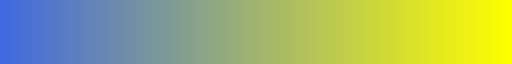

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
# Create a colormap for the gradient effect
effect_cmap = LinearSegmentedColormap.from_list('EffectGradient', [color1, color2])
effect_cmap

In [ ]:
# Create a dictionary to store drug names and their corresponding effect colors
data_label_dic = {}
for index, row in efficacy.iterrows():
    effect_color = effect_cmap(row['normalized_effect'])
    data_label_dic[row['name']] = effect_color

print(data_label_dic)

{'DB06594': (0.5295655517108804, 0.6286043829296424, 0.5570934256055363, 1.0), 'DB01156': (0.45943867743175704, 0.5732410611303345, 0.6401384083044982, 1.0), 'DB00215': (0.40099961553248753, 0.5271049596309112, 0.7093425605536332, 1.0), 'DB06700': (0.3717800845828527, 0.5040369088811996, 0.7439446366782007, 1.0), 'DB00476': (0.7253364090734333, 0.7831603229527104, 0.32525951557093424, 1.0), 'DB01175': (0.5587850826605152, 0.651672433679354, 0.5224913494809689, 1.0), 'DB00472': (0.40099961553248753, 0.5271049596309112, 0.7093425605536332, 1.0), 'DB00176': (0.5675509419454057, 0.6585928489042676, 0.5121107266435986, 1.0), 'DB08918': (0.47112648981161087, 0.5824682814302191, 0.6262975778546713, 1.0), 'DB04896': (0.6172241445597847, 0.6978085351787774, 0.4532871972318339, 1.0), 'DB00370': (0.766243752402922, 0.8154555940023068, 0.2768166089965398, 1.0), 'DB00715': (0.6289119569396386, 0.707035755478662, 0.43944636678200694, 1.0), 'DB00234': (0.2549019607843137, 0.4117647058823529, 0.882352

In [ ]:
# Format object for row colors
(dnames, deffects) = zip(*[(k, v) for (k, v) in data_label_dic.items()])
rc_df_1 = pd.DataFrame.from_dict({'name': dnames, 'Effect': deffects})
rc_df_1 = rc_df_1.set_index('name')
print(rc_df_1.head())

                                                    Effect
name                                                      
DB06594  (0.5295655517108804, 0.6286043829296424, 0.557...
DB01156  (0.45943867743175704, 0.5732410611303345, 0.64...
DB00215  (0.40099961553248753, 0.5271049596309112, 0.70...
DB06700  (0.3717800845828527, 0.5040369088811996, 0.743...
DB00476  (0.7253364090734333, 0.7831603229527104, 0.325...


In [ ]:
from matplotlib.colors import to_hex
# Convert effect RGB tuples to hexadecimal color codes
rc_df = rc_df_1
rc_df['Effect'] = rc_df['Effect'].apply(lambda x: to_hex(x))
rc_df['Effect'] = rc_df['Effect'].astype(str)
rc_df

,Effect
name,
DB06594,#87a08e
DB01156,#7592a3
DB00215,#6686b5
DB06700,#5f81be
DB00476,#b9c853
DB01175,#8ea685
DB00472,#6686b5
DB00176,#91a883
DB08918,#7895a0


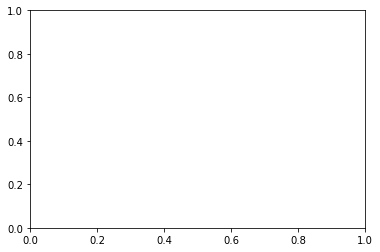

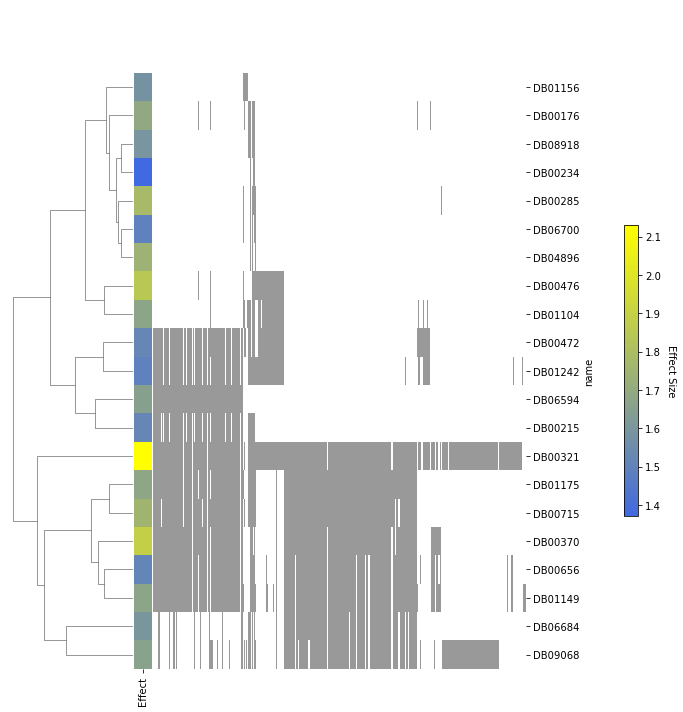

In [ ]:
from matplotlib.colors import LinearSegmentedColormap, to_hex, Normalize
import matplotlib.colorbar as colorbar
# formatting for better colorbar
myColors = ((0.0, 0.0, 0.0, 0.0), (0.6, 0.6, 0.6, 1.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

# Create a clustermap with continuous gradient for effect
fig, ax = plt.subplots()
g = sns.clustermap(data, cmap=cmap, yticklabels=True, xticklabels=False, row_colors=rc_df, col_cluster=False, dendrogram_ratio=(0.2, 0.1), cbar_pos=(0.05, 0.2, 0.03, 0.45))

# Add a colorbar legend to the side for the gradient, positioned further to the right
norm = Normalize(vmin=min_effect, vmax=max_effect)
sm = plt.cm.ScalarMappable(cmap=effect_cmap, norm=norm)
sm.set_array([])
cbar = g.fig.colorbar(sm, ax=g.ax_heatmap, orientation='vertical', fraction=0.03, pad=0.2)
cbar.set_label('Effect Size', rotation=270, labelpad=15)

g.cax.set_visible(False)

plt.show()